In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import koreanize_matplotlib 

In [78]:
TRAIN_PATH='UCI HAR Dataset/train/'
TEST_PATH='UCI HAR Dataset/test/'

In [79]:
with open('UCI HAR Dataset/features.txt') as f:
    cols=f.readlines()
    col=[]
    for i in cols:
        col_l=i.split(' ')
        col.append(col_l[1])

In [80]:
# feature 만드는함수
def get_feature(path,type):
    with open(path+f'X_{type}.txt') as f:
        data=f.readlines()
        datas=[]
        for i in range(len(data)):
            rows=data[i].split(' ')
            # '' 제거
            rows=[x for x in rows if x !='']
            datas.append(rows)
    return datas
        

In [81]:
# X_train 추출
train=get_feature(TRAIN_PATH,'train')
X_train=pd.DataFrame(train,columns=col)
X_train.to_csv('X_train.csv',index=False)

In [82]:
# X_test 추출
test=get_feature(TEST_PATH,'test')
X_test=pd.DataFrame(test,columns=col)
X_test.to_csv('X_test.csv',index=False)

In [104]:
# target 추출함수
def get_target(path,type):
    with open(path+f'y_{type}.txt') as f:
        data=f.read()
        datas=data.split('\n')
        # '' 제거
        datas=[x for x in datas if x !='']
        datas=pd.DataFrame(datas)
    return datas

In [105]:
# y_train 추출
y_train=get_target(TRAIN_PATH,'train')

# y_test 추추
y_test=get_target(TEST_PATH,'test')

In [106]:
# 책 204쪾
print('## 학습 데이터셋 info() ##')
print(X_train.info())

## 학습 데이터셋 info() ##
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 561 entries, tBodyAcc-mean()-X
 to angle(Z,gravityMean)

dtypes: object(561)
memory usage: 31.5+ MB
None


In [107]:
print(y_train.value_counts())

6    1407
5    1374
4    1286
1    1226
2    1073
3     986
Name: count, dtype: int64


In [109]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# 예제 반볷 시마다 동일한 예측 결과 도출을 위해 random_state 설정
dt_clf=DecisionTreeClassifier(random_state=156)
dt_clf.fit(X_train,y_train)
pred=dt_clf.predict(X_test)
accuracy=accuracy_score(y_test,pred)
print(f'결정 트리 예측 정확도 : {accuracy:.4f}')                          

# DecisionTreeClassifier 의 파라미터 추출
print('DecisionTreeClassifier 기본 하이퍼 파라미터:\n',dt_clf.get_params())

결정 트리 예측 정확도 : 0.8548
DecisionTreeClassifier 기본 하이퍼 파라미터:
 {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 156, 'splitter': 'best'}


In [111]:
from sklearn.model_selection import GridSearchCV

params={'max_depth':[6,8,10,12,16,20,24],'min_samples_split':[16]}

grid_cv=GridSearchCV(dt_clf,param_grid=params,scoring='accuracy',cv=5,verbose=1)
grid_cv.fit(X_train,y_train)
print(f'GridSearchCV 최고 평균 정확도 수치: {grid_cv.best_score_:.4f}')
print(f'GridSearchCV 최적 하이퍼 파라미터:',grid_cv.best_params_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
GridSearchCV 최고 평균 정확도 수치: 0.8549
GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 8, 'min_samples_split': 16}


In [112]:
# GridSearchCV 객체의 cv_results_속성을 DataFrame으로 생성
cv_result_df=pd.DataFrame(grid_cv.cv_results_)

# max_depth 파라미터 갑소가 그때의 테스트 세트, 학습 데이터 세트의 정확도 수치 추출
cv_result_df[['param_max_depth','mean_test_score']]

,param_max_depth,mean_test_score
0,6,0.847662
1,8,0.854879
2,10,0.852705
3,12,0.845768
4,16,0.847127
5,20,0.848624
6,24,0.848624


In [114]:
max_depths=[6,8,10,12,116,20,24]
# max_depth값을 변화시키면서 그떄마다 학습과 테스트 세트에서의 예측 성능 측정
for depth in max_depths:
    dt_clf=DecisionTreeClassifier(max_depth=depth,min_samples_leaf=16,random_state=156)
    dt_clf.fit(X_train,y_train)
    pred=dt_clf.predict(X_test)
    accuracy=accuracy_score(y_test,pred)
    print(f'max_depth={depth} 정확도 : {accuracy}')

max_depth=6 정확도 : 0.8537495758398371
max_depth=8 정확도 : 0.8605361384458772
max_depth=10 정확도 : 0.8585001696640652
max_depth=12 정확도 : 0.8571428571428571
max_depth=116 정확도 : 0.8557855446216491
max_depth=20 정확도 : 0.8557855446216491
max_depth=24 정확도 : 0.8557855446216491


In [117]:
params={'max_depth' : [8,12,16,20],'min_samples_split' :[16,24]}

grid_cv=GridSearchCV(dt_clf,param_grid=params,scoring='accuracy',cv=5,verbose=1)
grid_cv.fit(X_train,y_train)
print(f'GridSearchCV 최고 평균 정확도 수치 : {grid_cv.best_score_:.4f}')
print(f'GridSearchCV 최적 하이퍼 파라미터:',grid_cv.best_params_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
GridSearchCV 최고 평균 정확도 수치 : 0.8622
GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 8, 'min_samples_split': 16}


In [118]:
best_df_clf=grid_cv.best_estimator_
pred1=best_df_clf.predict(X_test)
accuracy=accuracy_score(y_test,pred1)
print(f'결정 트리 예츨 정확도 : {accuracy:.4f}')

결정 트리 예츨 정확도 : 0.8605


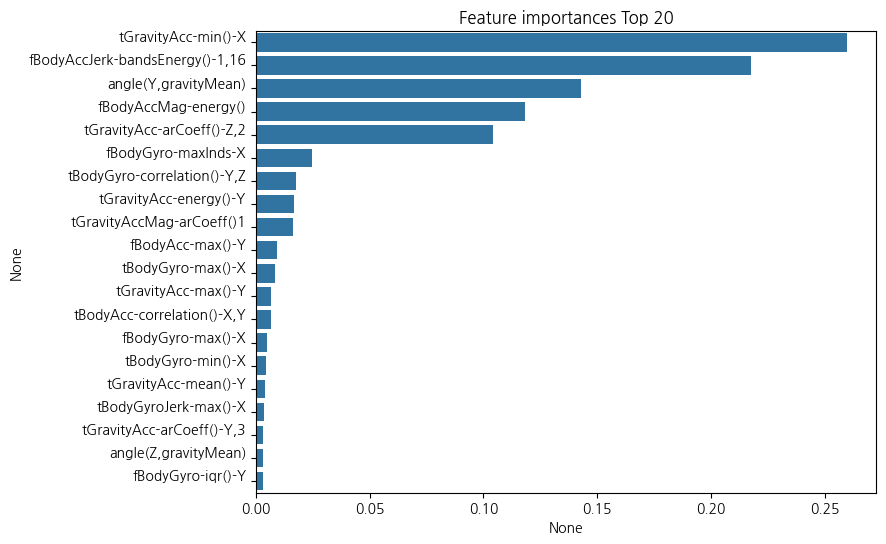

In [119]:
import seaborn as sns

ftr_importances_values=best_df_clf.feature_importances_
# Top 중요도로 정렬을 쉽게하고, 시본(seaborn)의 막대그래프로 쉽게 표현하기 위해 Series로 변환
ftr_importances=pd.Series(ftr_importances_values,index=X_train.columns)
# 중요도값 순으로 Series를 정렬
ftr_top20=ftr_importances.sort_values(ascending=False)[:20]
plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20,y=ftr_top20.index)
plt.show()